In [1]:
from PhaseEstimation import vqe, hamiltonians as ham
from PhaseEstimation import annni_model
from PhaseEstimation import visualization as qplt, general as qmlgen

In [2]:
# 16 points for h up to 1.5
# 18 points for kappa
H = ham.hamiltonian(annni_model.build_Hs, N = 6, n_hs = 16, n_kappas = 18, h_max = 1.5, kappa_max = 1)

In [3]:
myvqe = vqe.vqe(H, vqe.circuit_ising3)

In [4]:
# Train VQE
myvqe.train(lr = .1, n_epochs = 100, circuit = True)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine(lr = .01, n_epochs = 200, acc_thr = 0.01, assist = True)
myvqe.train_refine(lr = .001, n_epochs = 1000, acc_thr = 0.01, assist = False)

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(6.00)───||──H─╭C──RY(12.00)──────────────────────────────────────────────||──H─╭C
1: ──RY(1.00)──RX(7.00)───||──H─╰X─╭C──────────RY(13.00)───────────────────────────────────||──H─╰X
2: ──RY(2.00)──RX(8.00)───||──H────╰X─────────╭C──────────RY(14.00)────────────────────────||──H───
3: ──RY(3.00)──RX(9.00)───||──H───────────────╰X─────────╭C──────────RY(15.00)─────────────||──H───
4: ──RY(4.00)──RX(10.00)──||──H──────────────────────────╰X─────────╭C──────────RY(16.00)──||──H───
5: ──RY(5.00)──RX(11.00)──||──H─────────────────────────────────────╰X──────────RY(17.00)──||──H───

───RY(18.00)──────────────────────────────────────────────||──H─╭C──RY(24.00)──────────────────────
──╭C──────────RY(19.00)───────────────────────────────────||──H─╰X─╭C──────────RY(25.00)───────────
──╰X─────────╭C──────────RY(20.00)────────────────────────||──H────╰X─────────╭C──────────RY(26.00)
─────────────╰X─────────╭C──────────RY(21.00)─────────────||──H───────────────╰X─

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



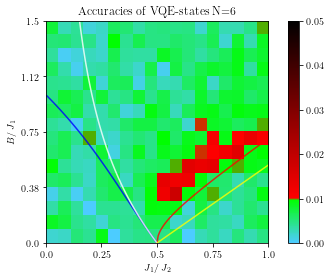

In [5]:
qplt.show_VQE_annni(myvqe)

if True:
    qplt.getlines_from_vqe(myvqe, qmlgen.paraanti, [0.5, myvqe.Hs.kappa_max], [0,myvqe.Hs.h_max], "red", res=100)
    qplt.getlines_from_vqe(myvqe, qmlgen.paraferro, [0, 0.5], [0,myvqe.Hs.h_max], "blue", res=100)
    qplt.getlines_from_vqe(myvqe, qmlgen.peshel_emery, [0, 0.5], [0,myvqe.Hs.h_max], "white", res=100)
    qplt.getlines_from_vqe(myvqe, qmlgen.b1, [0.5, myvqe.Hs.kappa_max], [0,myvqe.Hs.h_max], "yellow", res=100)



In [6]:
myvqe.save('./test')

: 